In [1]:
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack([gradient] * 20)  # Make it tall enough to see

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = "jet")
plt.axis('off')

plt.savefig(f"figures/cmaps/jet.png", dpi = 100, bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [ ]:
# 5 sims x 5 models = 25
# for sim_name, sim_func in simulations.items():
sim_name = "curve"

# Extract gt
y_test = y_test_dict[sim_name].detach().cpu()  # shape: (N_SIDE^2, 2)

X = x_test[:, 0].reshape(N_SIDE, N_SIDE).detach()
Y = x_test[:, 1].reshape(N_SIDE, N_SIDE).detach()

for model_name in ["GP", "dfGP", "dfNGP"]: # "dfNN",
    print(f"Processing {sim_name} with {model_name}...") 
    mean_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
    covar_path = "results_sim/" + model_name + "/" + sim_name + "_" + model_name + "_test_covar_predictions.pt"

    mean = torch.load(mean_path, weights_only = False).detach().cpu()
    covar = torch.load(covar_path, weights_only = False).detach().cpu()

    # covar_interleave = reshape_covar_block_to_interleaved(covar)

    n_samples = 3
    n_sample_tensor = draw_n_samples_block_input(mean, covar, n_samples, max_jitter = 1e-1)

    ### Uncertainty ###
    var = torch.diag(covar)[:(N_SIDE * N_SIDE)].reshape(N_SIDE, N_SIDE) + torch.diag(covar)[(N_SIDE * N_SIDE):].reshape(N_SIDE, N_SIDE)

    n_sample_tensor_speed = torch.sqrt(n_sample_tensor[:, :, :, 0]**2 + n_sample_tensor[:, :, :, 1]**2) 

    ### Samples ###
    for i in range(n_samples):
        sample = n_sample_tensor[i]

        sample_speed = n_sample_tensor_speed[i]

        U = sample[:, :, 0]
        V = sample[:, :, 1]

        plt.figure(figsize = (5, 5))

        ### Plot samples ###

        # background color
        # plt.pcolor(X, Y, sample_speed.detach().numpy(), cmap = "jet", vmin = 0, vmax = 3.0, alpha = 0.5)

        quiver_scale = standard_quiver_scale
        if sim_name == "branching":
            quiver_scale = branching_quiver_scale
        plt.quiver(X, Y, U, V, sample_speed, scale = quiver_scale, cmap = "jet", clim = (0.0, 3.0), 
                   linewidth = 0.08, width = 0.005, edgecolor = "gray") # fixed scale for consistency # width makes it fat

        plt.gca().set_aspect('equal')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        plt.savefig(f"figures/samples_speedcolor/{sim_name}_{model_name}_sample_{i}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

        if show_bool:
            plt.show()
        plt.close()

# Plot prediction


Training for REGIONC...

PINN


/tmp/ipykernel_2432896/2775760325.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train = torch.load(path_to_training_tensor).T # we need to transpose the tensor to hav

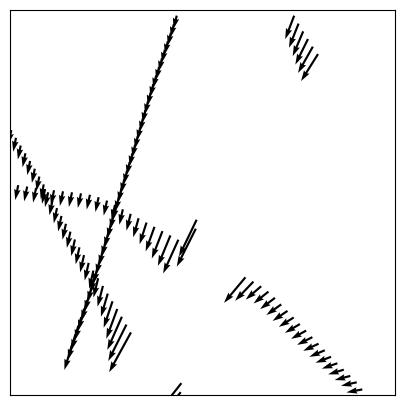


DFNN


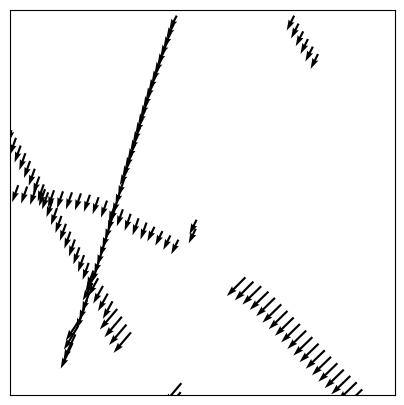


GP


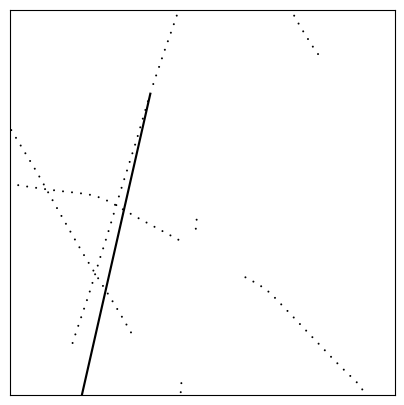


DFGP


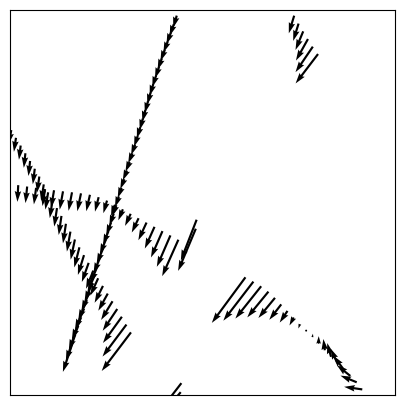


DFNGP


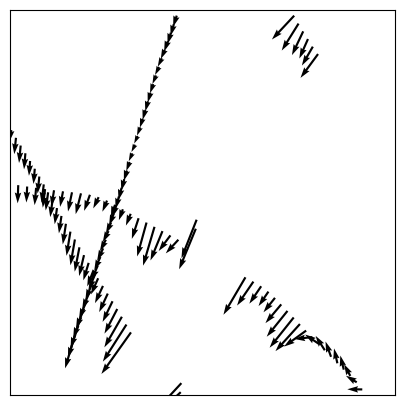


Training for REGIOND...

PINN


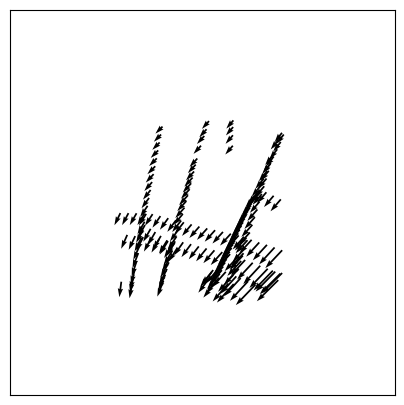


DFNN


FileNotFoundError: [Errno 2] No such file or directory: 'results_real/dfNN/regiond_dfNN_test_predictions.pt'

In [4]:
for region_name in ["regionc", "regiond"]:

    print(f"\nTraining for {region_name.upper()}...")

    # Store metrics for the current simulation
    region_results = []

    #########################
    ### x_train & y_train ###
    #########################

    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    train = torch.load(path_to_training_tensor).T # we need to transpose the tensor to have observations in the first dimension
    test = torch.load(path_to_test_tensor).T

    # The train and test tensors have the following columns:
    # [:, 0] = x
    # [:, 1] = y
    # [:, 2] = surface elevation (s)
    # [:, 3] = ice flux in x direction (u)
    # [:, 4] = ice flux in y direction (v)
    # [:, 5] = ice flux error in x direction (u_err)
    # [:, 6] = ice flux error in y direction (v_err)

    x_train = train[:, [0, 1]].to(device).cpu()
    y_train = train[:, [3, 4]].to(device).cpu()

    x_test = test[:, [0, 1]].to(device).cpu()
    y_test = test[:, [3, 4]].to(device).cpu()

    for model_name in ["PINN", "dfNN", "GP", "dfGP", "dfNGP"]:
        print(f"\n{model_name.upper()}")

        if model_name in ["dfGP", "GP", "dfNGP"]:
            path_to_y_test_prediction = "results_real/" + model_name + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path_to_y_test_prediction = "results_real/" + model_name + "/" + region_name + "_" + model_name + "_test_predictions.pt"

        y_test_prediction = torch.load(path_to_y_test_prediction).to(device).detach().cpu()

        fig, ax = plt.subplots(1, 1, figsize = (5, 5))
    
        # Plot ground truth test data in black
        ax.quiver(x_test[:, 0], x_test[:, 1], y_test_prediction[:, 0], y_test_prediction[:, 1], color = "black")

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

        # Remove axis labels
        ax.set_xticks([])
        ax.set_yticks([])
            
        ax.set_aspect("equal")

        plt.show()

# Plot prediction and gt


Training for REGIONC...

PINN


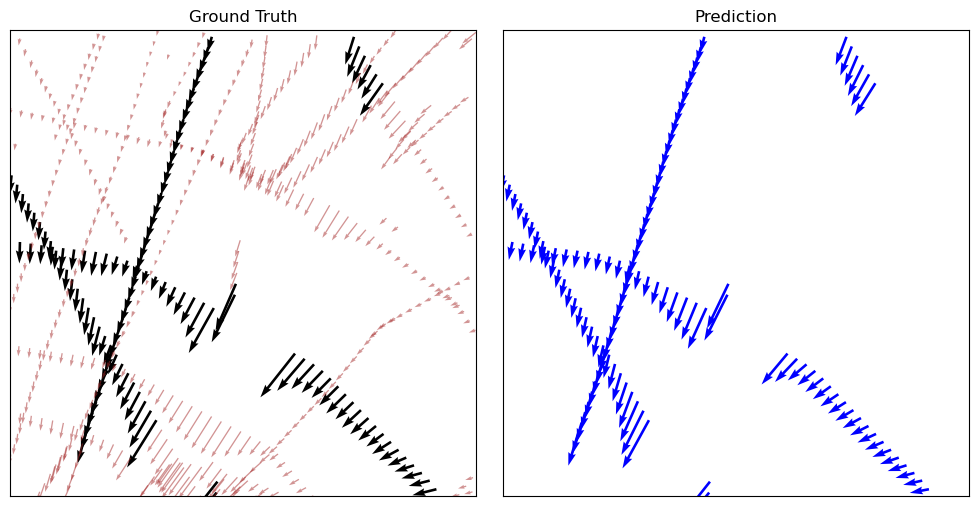


DFNGP


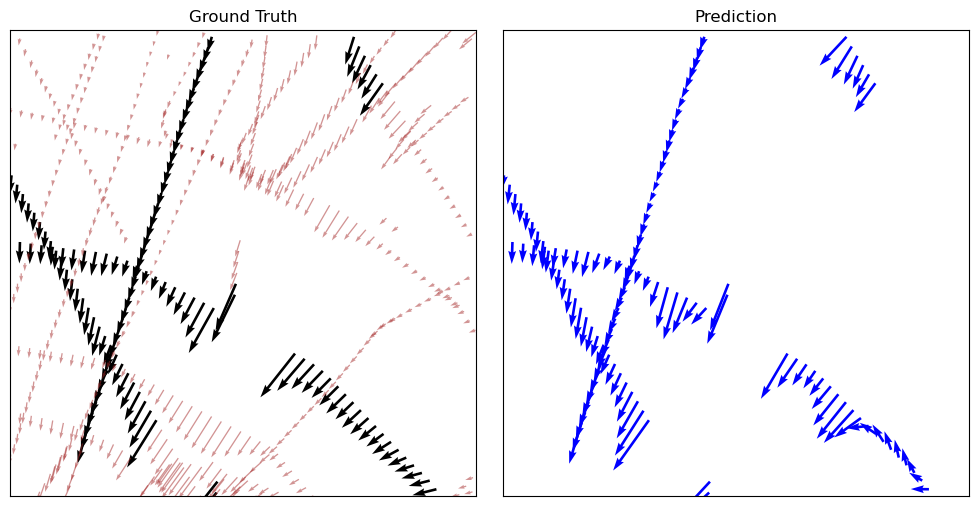


Training for REGIOND...

PINN


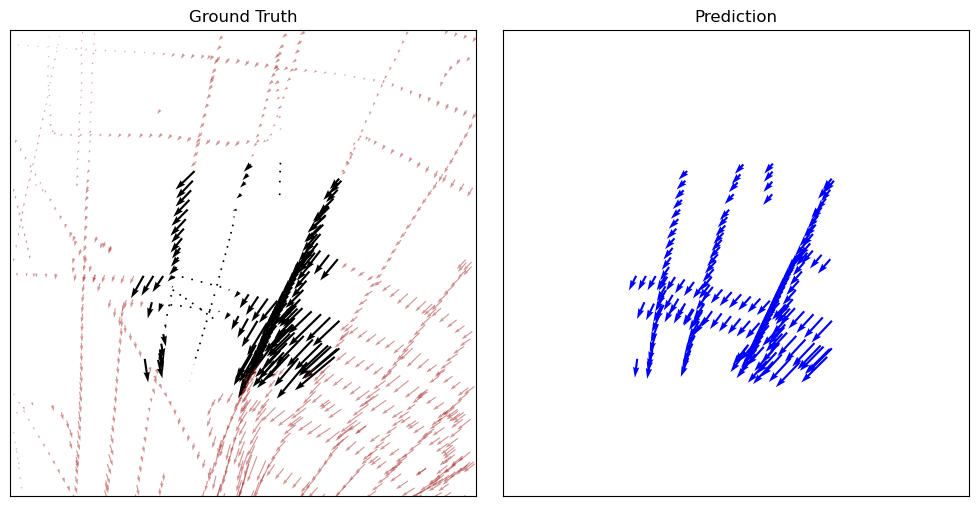


DFNGP


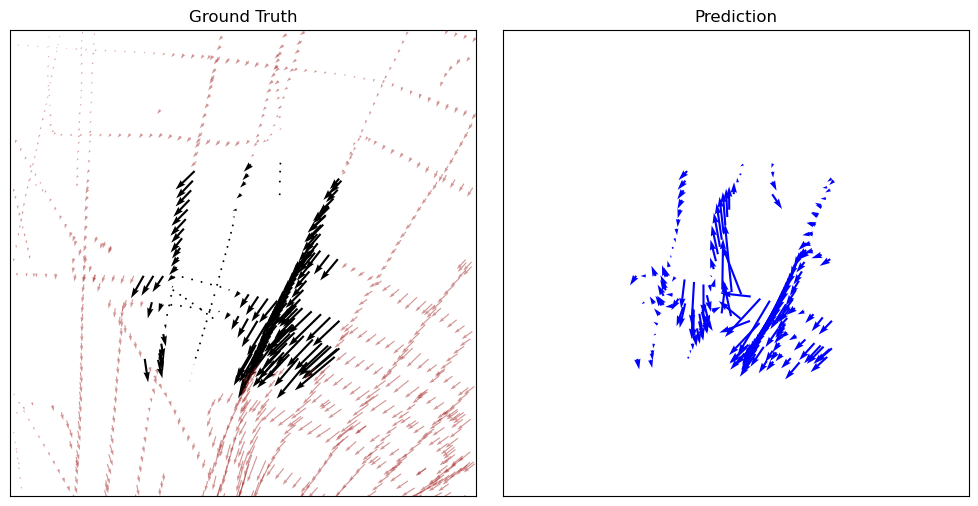

In [5]:
for region_name in ["regionc", "regiond"]:

    print(f"\nTraining for {region_name.upper()}...")

    # Store metrics for the current simulation
    region_results = []

    #########################
    ### x_train & y_train ###
    #########################

    path_to_training_tensor = "data/real_data/" + region_name + "_train_tensor.pt"
    path_to_test_tensor = "data/real_data/" + region_name + "_test_tensor.pt"

    train = torch.load(path_to_training_tensor, weights_only = False).T # we need to transpose the tensor to have observations in the first dimension
    test = torch.load(path_to_test_tensor, weights_only = False).T

    # The train and test tensors have the following columns:
    # [:, 0] = x
    # [:, 1] = y
    # [:, 2] = surface elevation (s)
    # [:, 3] = ice flux in x direction (u)
    # [:, 4] = ice flux in y direction (v)
    # [:, 5] = ice flux error in x direction (u_err)
    # [:, 6] = ice flux error in y direction (v_err)

    x_train = train[:, [0, 1]].to(device).cpu()
    y_train = train[:, [3, 4]].to(device).cpu()

    x_test = test[:, [0, 1]].to(device).cpu()
    y_test = test[:, [3, 4]].to(device).cpu()

    for model_name in ["PINN", "dfNGP"]:
    # for model_name in ["PINN", "dfNN", "GP", "dfGP", "dfNGP"]:
        print(f"\n{model_name.upper()}")

        if model_name in ["dfGP", "GP", "dfNGP"]:
            path_to_y_test_prediction = "results_real/" + model_name + "/" + region_name + "_" + model_name + "_test_mean_predictions.pt"
        else:
            path_to_y_test_prediction = "results_real/" + model_name + "/" + region_name + "_" + model_name + "_test_predictions.pt"

        y_test_prediction = torch.load(path_to_y_test_prediction, weights_only = False).to(device).detach().cpu()

        fig, axes = plt.subplots(1, 2, figsize = (10, 5))

        # --- Plot Ground Truth on the left ---
        axes[0].quiver(x_test[:, 0], x_test[:, 1], y_test[:, 0], y_test[:, 1], color = "black")
        axes[0].quiver(x_train[:, 0], x_train[:, 1], y_train[:, 0], y_train[:, 1], color = "brown", alpha = 0.5)
        axes[0].set_title("Ground Truth")
        axes[0].set_xlim(0, 1)
        axes[0].set_ylim(0, 1)
        axes[0].set_xticks([])
        axes[0].set_yticks([])
        axes[0].set_aspect("equal")

        # --- Plot Prediction on the right ---
        axes[1].quiver(x_test[:, 0], x_test[:, 1], y_test_prediction[:, 0], y_test_prediction[:, 1], color = "blue")
        axes[1].set_title("Prediction")
        axes[1].set_xlim(0, 1)
        axes[1].set_ylim(0, 1)
        axes[1].set_xticks([])
        axes[1].set_yticks([])
        axes[1].set_aspect("equal")

        plt.tight_layout()
        plt.show()